# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('./')) #for import common.utility
from utility import plot_confusion_matrix,plot_decision_regions,testcase_report

## Step1. 下載資料

In [3]:
breast_cancer=datasets.load_breast_cancer()

In [4]:
#
print(breast_cancer.DESCR)
print("=======================================================")
print(breast_cancer.keys())
print("=======================================================")
print(breast_cancer.feature_names)
print(breast_cancer.target_names)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
#資料內容
feature = breast_cancer.data
target = breast_cancer.target
print(feature)
print(target)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [6]:
x = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
x = x.iloc[:,0:10]
y = pd.DataFrame(breast_cancer['target'], columns=['target'])
breast_cancer_data = pd.concat([x,y], axis=1)
breast_cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0


In [7]:
malignant=pd.DataFrame(breast_cancer_data[target==0])
benign=pd.DataFrame(breast_cancer_data[target==1])
benign

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,1
...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,1


In [8]:
p=malignant["mean compactness"]
q=malignant["mean concavity"]

malignant_data = pd.concat([p,q], axis=1)
malignant_data

,mean compactness,mean concavity
0,0.27760,0.30010
1,0.07864,0.08690
2,0.15990,0.19740
3,0.28390,0.24140
4,0.13280,0.19800
...,...,...
563,0.22360,0.31740
564,0.11590,0.24390
565,0.10340,0.14400
566,0.10230,0.09251


In [9]:
a=benign["mean compactness"]
b=benign["mean concavity"]

benign_data = pd.concat([a,b], axis=1)
benign_data

,mean compactness,mean concavity
19,0.08129,0.06664
20,0.12700,0.04568
21,0.06492,0.02956
37,0.03766,0.02562
46,0.05943,0.01588
...,...,...
558,0.13300,0.10290
559,0.10210,0.11120
560,0.11260,0.04462
561,0.03558,0.00000


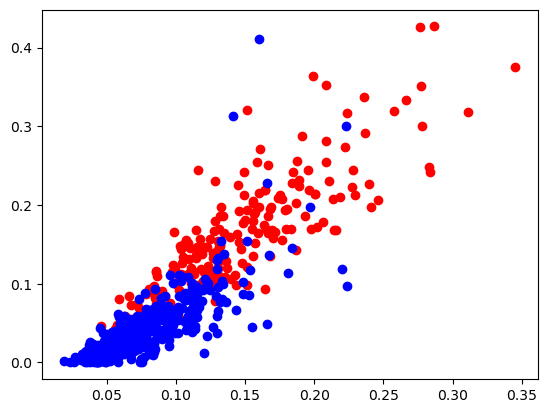

In [10]:
plt.scatter(p,q,color='red')
plt.scatter(a,b,color='blue')

In [11]:
training_data = pd.concat([malignant_data,benign_data], axis=0)
training_labels = pd.concat([malignant["target"],benign["target"]], axis=0)
print(training_data.shape)
print(training_labels.shape)
training_data

(569, 2)
(569,)


,mean compactness,mean concavity
0,0.27760,0.30010
1,0.07864,0.08690
2,0.15990,0.19740
3,0.28390,0.24140
4,0.13280,0.19800
...,...,...
558,0.13300,0.10290
559,0.10210,0.11120
560,0.11260,0.04462
561,0.03558,0.00000


In [12]:
clf=svm.LinearSVC()
clf.fit(training_data,training_labels)

LinearSVC()

C:\Users\chih-yu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


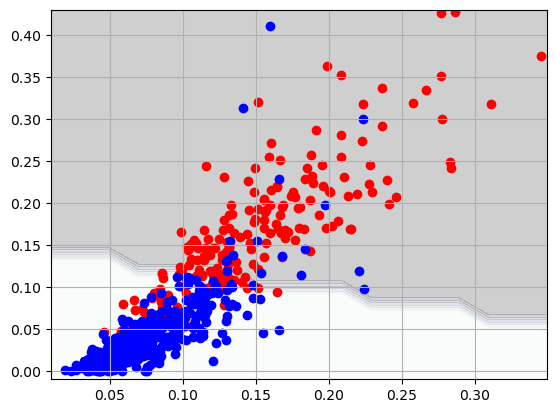

In [13]:
training_x_min=training_data.values[:,0].min()-0.01
training_x_max=training_data.values[:,0].max()+0.01
training_y_min=training_data.values[:,1].min()-0.01
training_y_max=training_data.values[:,1].max()+0.01
grid_interval=0.02
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))

Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
plt.autoscale()
plt.grid()
plt.scatter(p,q,color='red')
plt.scatter(a,b,color='blue')
plt.show()

C:\Users\chih-yu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


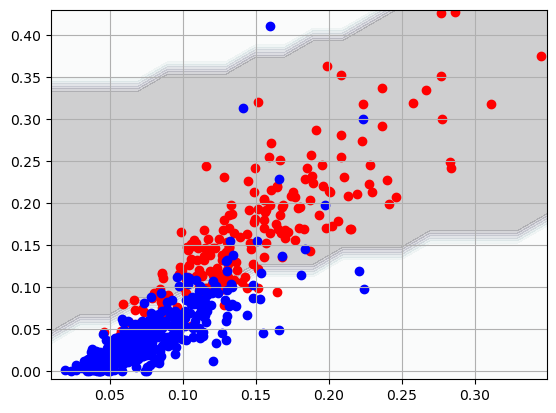

In [14]:
def SVM_plot(clf,title):
    training_x_min=training_data.values[:,0].min()-0.01
    training_x_max=training_data.values[:,0].max()+0.01
    training_y_min=training_data.values[:,1].min()-0.01
    training_y_max=training_data.values[:,1].max()+0.01
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))

    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)

    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(p,q,color='red')
    plt.scatter(a,b,color='blue')
    plt.show()
    
clf=svm.SVC(kernel='rbf',gamma=5,C=100)
clf.fit(training_data,training_labels)
SVM_plot(clf,'rbf')

C=10,gamma=5


C:\Users\chih-yu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


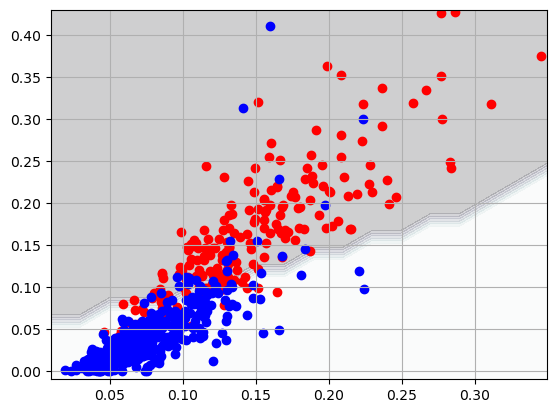

C=10,gamma=10


C:\Users\chih-yu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


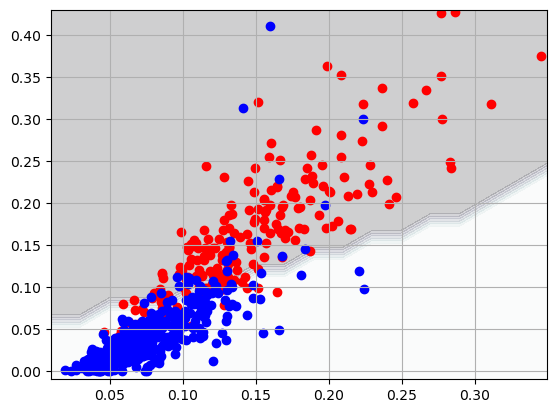

C:\Users\chih-yu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C=100,gamma=5


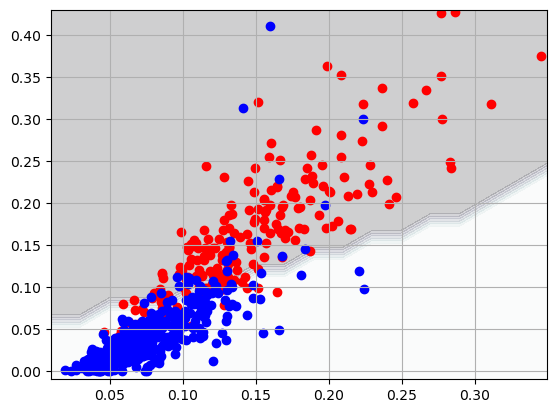

C=100,gamma=10


C:\Users\chih-yu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


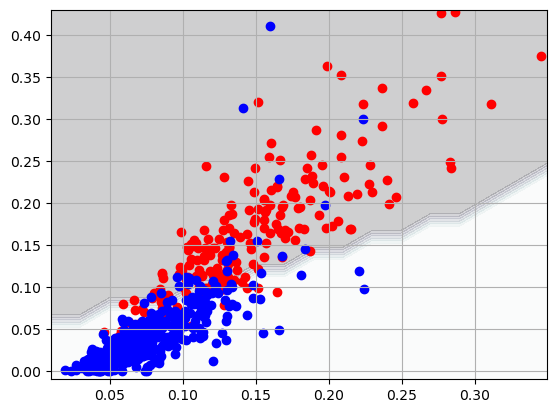

In [15]:
C = [10,100]
gamma = [5,10]

for i in range(len(C)):
    for j in range(len(gamma)):
        print('C={0},gamma={1}'.format(C[i],gamma[j]))
        clf=svm.SVC(kernel='rbf',C=100,gamma=1)
        clf.fit(training_data,training_labels)
        SVM_plot(clf,'rbf-C={0},gamma={1}'.format(C[i],gamma[j]))

## Step2. 區分訓練集與測試集

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_data.drop(['target'],axis=1), breast_cancer_data['target'], test_size=0.3,random_state = 1)
print(X_train)
print(y_train)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
249        11.52         14.93           73.87      406.3          0.10130   
58         13.05         19.31           82.61      527.2          0.08060   
476        14.20         20.53           92.41      618.4          0.08931   
529        12.07         13.44           77.83      445.2          0.11000   
422        11.61         16.02           75.46      408.2          0.10880   
..           ...           ...             ...        ...              ...   
129        19.79         25.12          130.40     1192.0          0.10150   
144        10.75         14.97           68.26      355.3          0.07793   
72         17.20         24.52          114.20      929.4          0.10710   
235        14.03         21.25           89.79      603.4          0.09070   
37         13.03         18.42           82.61      523.8          0.08983   

     mean compactness  mean concavity  mean concave points  mea

In [17]:
print(X_test)
print(y_test)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
421        14.69         13.98           98.22      656.1          0.10310   
47         13.17         18.66           85.98      534.6          0.11580   
292        12.95         16.02           83.14      513.7          0.10050   
186        18.31         18.58          118.60     1041.0          0.08588   
414        15.13         29.81           96.71      719.5          0.08320   
..           ...           ...             ...        ...              ...   
6          18.25         19.98          119.60     1040.0          0.09463   
487        19.44         18.82          128.10     1167.0          0.10890   
11         15.78         17.89          103.60      781.0          0.09710   
268        12.87         16.21           82.38      512.2          0.09425   
419        11.16         21.41           70.95      380.3          0.10180   

     mean compactness  mean concavity  mean concave points  mea

## Step3. 建模

In [18]:
'''
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)
'''

"\nclf=svm.SVC(kernel='poly',gamma='auto',C=100)\nclf.fit(X_train,y_train)\n"

In [19]:
x1 = pd.DataFrame(X_train)
y1 = pd.DataFrame(y_train)
x1y1_data = pd.concat([x1,y1], axis=1)
x1y1_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.029290,0.1883,0.06168,1
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,1
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,1
529,12.07,13.44,77.83,445.2,0.11000,0.09009,0.037810,0.027980,0.1657,0.06608,1
422,11.61,16.02,75.46,408.2,0.10880,0.11680,0.070970,0.044970,0.1886,0.06320,1
...,...,...,...,...,...,...,...,...,...,...,...
129,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113,0
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,1
72,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487,0
235,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,1


In [20]:
malignant1=x1y1_data[x1y1_data["target"]==0]
benign1=x1y1_data[x1y1_data["target"]==1]

In [21]:
p1=malignant1["mean perimeter"]
q1=malignant1["mean symmetry"]

malignant_data1 = pd.concat([p1,q1], axis=1)

a1=benign1["mean perimeter"]
b1=benign1["mean symmetry"]

benign_data1 = pd.concat([a1,b1], axis=1)


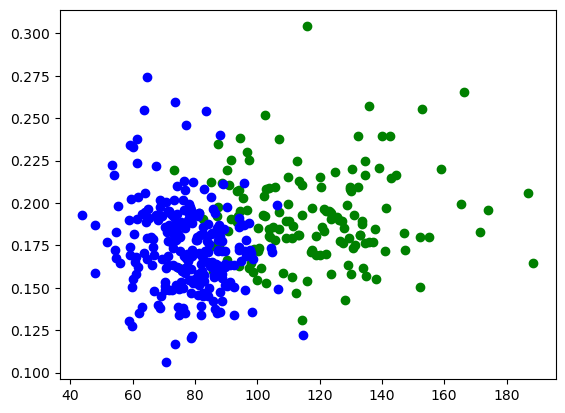

In [22]:
plt.scatter(p1,q1,color='green')
plt.scatter(a1,b1,color='blue')

In [29]:
training_data1 = pd.concat([malignant_data1,benign_data1], axis=0)
training_labels1 = pd.concat([malignant1["target"],benign1["target"]], axis=0)
print(training_data1.shape)
print(training_labels1.shape)
training_data1

(398, 2)
(398,)


,mean perimeter,mean symmetry
18,130.00,0.1582
168,116.10,0.1538
121,121.40,0.1966
566,108.30,0.1590
260,132.90,0.1814
...,...,...
390,65.75,0.1800
508,104.70,0.1711
144,68.26,0.1399
235,89.79,0.1517


In [24]:
clf=svm.LinearSVC()
clf.fit(training_data1,training_labels1)

C:\Users\chih-yu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

C:\Users\chih-yu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


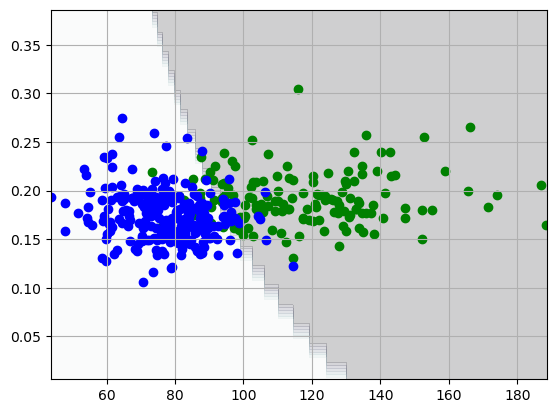

In [25]:
def SVM_plot(clf,title):
    training_x_min1=training_data1.values[:,0].min()-0.1
    training_x_max1=training_data1.values[:,0].max()+0.1
    training_y_min1=training_data1.values[:,1].min()-0.1
    training_y_max1=training_data1.values[:,1].max()+0.1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min1,training_x_max1,grid_interval),np.arange(training_y_min1,training_y_max1,grid_interval))

    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)

    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(p1,q1,color='green')
    plt.scatter(a1,b1,color='blue')
    plt.show()
    
clf=svm.SVC(kernel='poly',gamma='auto',C=0.5)
clf.fit(training_data1,training_labels1)
SVM_plot(clf,'poly')

## Step4. 預測

```

```


In [28]:
X_test_data = X_test[["mean perimeter","mean symmetry"]]
clf.predict(X_test_data)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

## Step5. 準確度分析

In [31]:
X_train_data = X_train[["mean perimeter","mean symmetry"]]
print(clf.score(X_train_data,y_train))

0.914572864321608


In [32]:
X_test_data = X_test[["mean perimeter","mean symmetry"]]
print(clf.score(X_test_data, y_test))

0.8596491228070176


In [ ]:
#因為整體預測的話，電腦跑不動且會當機，故只把程式碼打上

In [ ]:
breast_cancer=datasets.load_breast_cancer()
X=breast_cancer.data
y=breast_cancer.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [ ]:
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)

In [ ]:
clf.predict(X_test)

In [ ]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))